In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_unido = pd.read_csv('/content/drive/MyDrive/Inteligencia artificial/ProyectoIA/nuevo/data/datosUnidos/df_unido.csv')
df_unido.head()

,segundo,landmark_10_x,landmark_10_y,landmark_10_z,landmark_11_x,landmark_11_y,landmark_11_z,landmark_12_x,landmark_12_y,landmark_12_z,...,mano_derecha_prom_y,mano_derecha_prom_z,pie_izquierdo_prom_x,pie_izquierdo_prom_y,pie_izquierdo_prom_z,pie_derecho_prom_x,pie_derecho_prom_y,pie_derecho_prom_z,Etiqueta,Vista
0,0.03,0.519331,0.357692,-0.156593,0.557772,0.427935,-0.043421,0.484074,0.418862,-0.053209,...,0.649838,-0.112728,0.533407,0.915774,0.128277,0.498675,0.915368,0.1123351727922757,vertical,frontal
1,0.07,0.519291,0.358392,-0.179541,0.557721,0.427952,-0.060467,0.484069,0.419904,-0.067065,...,0.649727,-0.124972,0.533527,0.915678,0.115890,0.498686,0.914055,0.1120271769662698,vertical,frontal
2,0.10,0.519278,0.358941,-0.175015,0.557587,0.427935,-0.057566,0.484068,0.420497,-0.065557,...,0.649661,-0.124191,0.533445,0.915333,0.111057,0.498694,0.912966,0.1083002140124638,vertical,frontal
3,0.13,0.519231,0.359378,-0.172069,0.557482,0.427900,-0.055857,0.484062,0.420832,-0.063677,...,0.649518,-0.122494,0.533454,0.915058,0.110330,0.498658,0.911394,0.1085873308281103,vertical,frontal
4,0.17,0.519205,0.359543,-0.170336,0.557410,0.427830,-0.054852,0.484062,0.421015,-0.062663,...,0.649357,-0.121605,0.533473,0.914959,0.107250,0.498513,0.910842,0.1080359295010566,vertical,frontal


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6138 entries, 0 to 6137
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   segundo                5898 non-null   float64
 1   landmark_10_x          5898 non-null   float64
 2   landmark_10_y          5898 non-null   float64
 3   landmark_10_z          5898 non-null   float64
 4   landmark_11_x          5898 non-null   float64
 5   landmark_11_y          5898 non-null   float64
 6   landmark_11_z          5893 non-null   float64
 7   landmark_12_x          5898 non-null   float64
 8   landmark_12_y          5898 non-null   float64
 9   landmark_12_z          5896 non-null   float64
 10  landmark_13_x          5898 non-null   float64
 11  landmark_13_y          5898 non-null   float64
 12  landmark_13_z          5893 non-null   float64
 13  landmark_14_x          5898 non-null   float64
 14  landmark_14_y          5898 non-null   float64
 15  land

In [ ]:
# prompt: # prompt: Convertir los object de df_unido a float64, menos etiqueta y vista

# Identify the columns to convert
columns_to_convert = [col for col in df_unido.columns if df_unido[col].dtype == 'object' and col not in ['Etiqueta', 'Vista']]

# Convert the specified columns to float64
for col in columns_to_convert:
  try:
    df_unido[col] = df_unido[col].astype('float64')
  except ValueError as e:
    print(f"Could not convert column '{col}' to float64. Error: {e}")
    # Optionally, you can inspect the unique values in the column to understand the issue
    print(f"Unique values in '{col}': {df_unido[col].unique()}")

# Display info again to verify the changes
df_unido.info()

Could not convert column 'landmark_23_z' to float64. Error: could not convert string to float: '-9,91E+10'
Unique values in 'landmark_23_z': ['0.0024031265638768673' '0.0018029457423835993' '0.0016051271231845021'
 ... '-0.0776695385575294' '-0.0778032094240188' '-0.0780789330601692']
Could not convert column 'landmark_24_z' to float64. Error: could not convert string to float: '6,62E+08'
Unique values in 'landmark_24_z': ['-0.0024228624533861876' '-0.0018327912548556924'
 '-0.0016373564722016454' ... '0.0777502879500389' '0.0778851360082626'
 '0.0781603828072547']
Could not convert column 'landmark_25_z' to float64. Error: could not convert string to float: '6,64E+10'
Unique values in 'landmark_25_z': ['0.0179568082094192' '0.0097252111881971' '0.0083289593458175' ...
 '-0.1316922456026077' '-0.1299728602170944' '-0.1309246867895126']
Could not convert column 'landmark_26_z' to float64. Error: could not convert string to float: '1,45E+10'
Unique values in 'landmark_26_z': ['0.01196442

In [ ]:
df = df_unido.copy()

In [ ]:
cols_obj = ['landmark_23_z', 'landmark_24_z', 'landmark_25_z', 'landmark_26_z', 'pie_derecho_prom_z']

for col in cols_obj:
    df[col] = df[col].str.replace(',', '.', regex=False)  # reemplaza coma por punto
    df[col] = pd.to_numeric(df[col], errors='coerce')      # convierte a float, NaN si falla


In [ ]:
print(df[cols_obj].dtypes)


landmark_23_z         float64
landmark_24_z         float64
landmark_25_z         float64
landmark_26_z         float64
pie_derecho_prom_z    float64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6138 entries, 0 to 6137
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   segundo                5898 non-null   float64
 1   landmark_10_x          5898 non-null   float64
 2   landmark_10_y          5898 non-null   float64
 3   landmark_10_z          5898 non-null   float64
 4   landmark_11_x          5898 non-null   float64
 5   landmark_11_y          5898 non-null   float64
 6   landmark_11_z          5893 non-null   float64
 7   landmark_12_x          5898 non-null   float64
 8   landmark_12_y          5898 non-null   float64
 9   landmark_12_z          5896 non-null   float64
 10  landmark_13_x          5898 non-null   float64
 11  landmark_13_y          5898 non-null   float64
 12  landmark_13_z          5893 non-null   float64
 13  landmark_14_x          5898 non-null   float64
 14  landmark_14_y          5898 non-null   float64
 15  land

In [ ]:
df = df.drop(columns=['Vista'])


In [ ]:
df.head()

,segundo,landmark_10_x,landmark_10_y,landmark_10_z,landmark_11_x,landmark_11_y,landmark_11_z,landmark_12_x,landmark_12_y,landmark_12_z,...,mano_derecha_prom_x,mano_derecha_prom_y,mano_derecha_prom_z,pie_izquierdo_prom_x,pie_izquierdo_prom_y,pie_izquierdo_prom_z,pie_derecho_prom_x,pie_derecho_prom_y,pie_derecho_prom_z,Etiqueta
0,0.03,0.519331,0.357692,-0.156593,0.557772,0.427935,-0.043421,0.484074,0.418862,-0.053209,...,0.471888,0.649838,-0.112728,0.533407,0.915774,0.128277,0.498675,0.915368,0.112335,vertical
1,0.07,0.519291,0.358392,-0.179541,0.557721,0.427952,-0.060467,0.484069,0.419904,-0.067065,...,0.471893,0.649727,-0.124972,0.533527,0.915678,0.115890,0.498686,0.914055,0.112027,vertical
2,0.10,0.519278,0.358941,-0.175015,0.557587,0.427935,-0.057566,0.484068,0.420497,-0.065557,...,0.471776,0.649661,-0.124191,0.533445,0.915333,0.111057,0.498694,0.912966,0.108300,vertical
3,0.13,0.519231,0.359378,-0.172069,0.557482,0.427900,-0.055857,0.484062,0.420832,-0.063677,...,0.471715,0.649518,-0.122494,0.533454,0.915058,0.110330,0.498658,0.911394,0.108587,vertical
4,0.17,0.519205,0.359543,-0.170336,0.557410,0.427830,-0.054852,0.484062,0.421015,-0.062663,...,0.471636,0.649357,-0.121605,0.533473,0.914959,0.107250,0.498513,0.910842,0.108036,vertical


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6138 entries, 0 to 6137
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   segundo                5898 non-null   float64
 1   landmark_10_x          5898 non-null   float64
 2   landmark_10_y          5898 non-null   float64
 3   landmark_10_z          5898 non-null   float64
 4   landmark_11_x          5898 non-null   float64
 5   landmark_11_y          5898 non-null   float64
 6   landmark_11_z          5893 non-null   float64
 7   landmark_12_x          5898 non-null   float64
 8   landmark_12_y          5898 non-null   float64
 9   landmark_12_z          5896 non-null   float64
 10  landmark_13_x          5898 non-null   float64
 11  landmark_13_y          5898 non-null   float64
 12  landmark_13_z          5893 non-null   float64
 13  landmark_14_x          5898 non-null   float64
 14  landmark_14_y          5898 non-null   float64
 15  land

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5745 entries, 0 to 6084
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   segundo                5745 non-null   float64
 1   landmark_10_x          5745 non-null   float64
 2   landmark_10_y          5745 non-null   float64
 3   landmark_10_z          5745 non-null   float64
 4   landmark_11_x          5745 non-null   float64
 5   landmark_11_y          5745 non-null   float64
 6   landmark_11_z          5745 non-null   float64
 7   landmark_12_x          5745 non-null   float64
 8   landmark_12_y          5745 non-null   float64
 9   landmark_12_z          5745 non-null   float64
 10  landmark_13_x          5745 non-null   float64
 11  landmark_13_y          5745 non-null   float64
 12  landmark_13_z          5745 non-null   float64
 13  landmark_14_x          5745 non-null   float64
 14  landmark_14_y          5745 non-null   float64
 15  landmark_

In [ ]:

cols_features = df.select_dtypes(include=[float]).columns.drop('segundo')

X = df[cols_features]
y = df['Etiqueta']


In [ ]:
df['Etiqueta'] = df['Etiqueta'].str.strip().str.lower()


In [ ]:
print(df['Etiqueta'].value_counts())


Etiqueta
vertical        1607
sentandose       983
girando          897
acercandose      776
alejandose       753
inclinandose     729
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

print("--- Paso 1: Limpieza y Preparación de Datos ---")

df['Etiqueta'] = df['Etiqueta'].str.strip().str.lower()
df.dropna(subset=['Etiqueta'], inplace=True)

cols_to_drop = ['Etiqueta', 'Vista', 'segundo']
cols_to_drop_existing = [col for col in cols_to_drop if col in df.columns]
X = df.drop(columns=cols_to_drop_existing)
y = df['Etiqueta']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Datos divididos.")

print("\n--- Paso 2: GridSearchCV para encontrar mejor modelo (versión optimizada) ---")

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_leaf': [5],
    'min_samples_split': [10]
}

# GridSearch optimizado
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=1,
    verbose=1
)

try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f" Error durante GridSearch: {e}")
    exit()

best_model = grid_search.best_estimator_
print(f"\nMejores parámetros: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

train_acc = best_model.score(X_train, y_train)
test_acc = best_model.score(X_test, y_test)

print("\n--- Diagnóstico Final ---")
print(f"Precisión en entrenamiento: {train_acc:.4f}")
print(f"Precisión en prueba:       {test_acc:.4f}")


--- Paso 1: Limpieza y Preparación de Datos ---
Datos divididos.

--- Paso 2: GridSearchCV para encontrar mejor modelo (versión optimizada) ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

 acercandose       1.00      0.99      0.99       155
  alejandose       0.99      1.00      0.99       151
     girando       0.96      0.97      0.96       179
inclinandose       0.96      0.96      0.96       146
  sentandose       0.98      0.96      0.97       197
    vertical       0.95      0.96      0.95       321

    accuracy                           0.97      1149
   macro avg       0.97      0.97      0.97      1149
weighted avg       0.97      0.97      0.97      1149


--- Diagnóstico Final ---
Precisión en entrenamiento: 0.9911
Precisión en prueba:       0.9695


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5)
print("Precisión en validación cruzada (5 folds):", scores)
print("Promedio:", np.mean(scores))


Precisión en validación cruzada (5 folds): [0.71888599 0.70583116 0.64229765 0.64577894 0.47693647]
Promedio: 0.6379460400348128


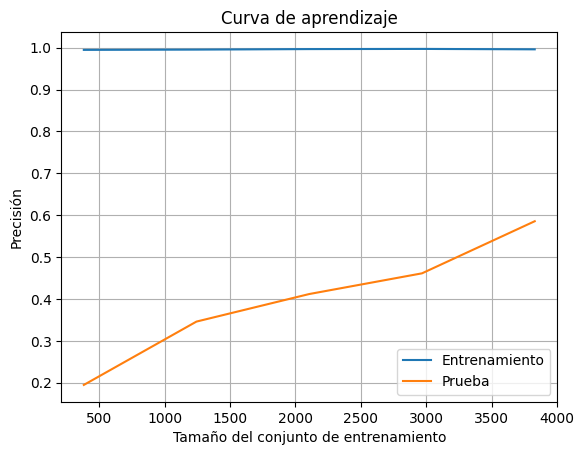

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import joblib
import os

filename = 'modelo_postura_final.joblib'

joblib.dump(best_model, filename)

print(f"¡Éxito! Tu modelo ha sido guardado en:")
print(os.path.abspath(filename))

In [ ]:
print("Forma de las Características (X):", X.shape)
print("Forma del Objetivo (y):", y.shape)

Forma de las Características (X): (5745, 42)
Forma del Objetivo (y): (5745,)


In [ ]:
print(df['Etiqueta'].value_counts())

Etiqueta
vertical        1607
sentandose       983
girando          897
acercandose      776
alejandose       753
inclinandose     729
Name: count, dtype: int64


In [ ]:
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"Precisión en ENTRENAMIENTO: {train_accuracy:.4f}")
print(f"Precisión en PRUEBA:      {test_accuracy:.4f}")


Precisión en ENTRENAMIENTO: 0.9911
Precisión en PRUEBA:      0.9695


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5)
print("Precisión en validación cruzada (5 folds):", scores)
print("Promedio:", np.mean(scores))


Precisión en validación cruzada (5 folds): [0.71888599 0.70583116 0.64229765 0.64577894 0.47693647]
Promedio: 0.6379460400348128


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calcular pesos automáticamente
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y),
    y=y
)
class_weight_dict = dict(zip(np.unique(y), class_weights))

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')
print(f"CV scores: {scores}")
print(f"Promedio: {scores.mean():.4f} ± {scores.std():.4f}")

CV scores: [0.93820714 0.94778068 0.95996519 0.94429939 0.96692776]
Promedio: 0.9514 ± 0.0105


In [ ]:
rf.fit(X, y)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

y_pred_cv = cross_val_predict(rf, X, y, cv=skf)
print(confusion_matrix(y, y_pred_cv))
print(classification_report(y, y_pred_cv))


[[ 754   22    0    0    0    0]
 [   2  751    0    0    0    0]
 [   0    0  852    0    0   45]
 [   0    0    2  664    0   63]
 [   0    0   16   13  911   43]
 [   4   26   24    7   12 1534]]
              precision    recall  f1-score   support

 acercandose       0.99      0.97      0.98       776
  alejandose       0.94      1.00      0.97       753
     girando       0.95      0.95      0.95       897
inclinandose       0.97      0.91      0.94       729
  sentandose       0.99      0.93      0.96       983
    vertical       0.91      0.95      0.93      1607

    accuracy                           0.95      5745
   macro avg       0.96      0.95      0.95      5745
weighted avg       0.95      0.95      0.95      5745



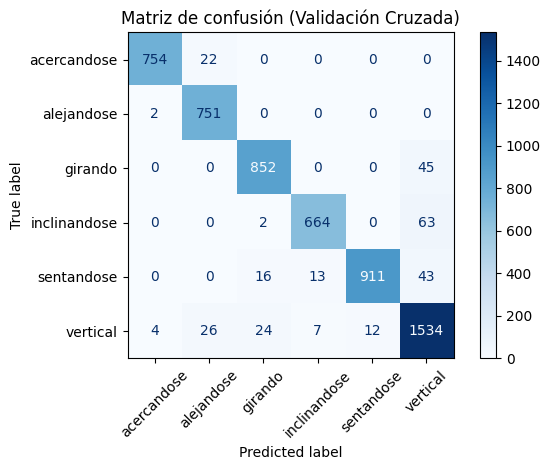

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(rf, X, y, cv=skf)

cm = confusion_matrix(y, y_pred_cv, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de confusión (Validación Cruzada)")
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import os

filename = 'modelo_postura_produccion.joblib'

joblib.dump(rf, filename)

print(f"Modelo final guardado exitosamente en:")
print(os.path.abspath(filename))

Modelo final guardado exitosamente en:
/content/modelo_postura_produccion.joblib
